South Asia
Electricity Access VS GDP

## Load Data

In [542]:
import os
path = r'C:\Users\nadda\Desktop\KU\01204314-65-Statistics-for-Computer-Engineering-Applications\week10'
data_path = os.path.join(path, "data")
processed_data_path = os.path.join(path, "processed_data")
os.chdir(path)
os.getcwd()

'C:\\Users\\nadda\\Desktop\\KU\\01204314-65-Statistics-for-Computer-Engineering-Applications\\week10'

In [543]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from pandas.plotting import scatter_matrix

In [544]:
df_regions = pd.read_excel(os.path.join(data_path, "countries_regions.xlsx"))
df_regions.reset_index(inplace=True)

df_hos = pd.read_csv(os.path.join(processed_data_path, "hospital.csv"))

df_life = pd.read_csv(os.path.join(processed_data_path, "life_expectancy.csv"))

South Asia
Western Asia
Southeast Asia
East Asia
North America
South America
Eastern Europe
Western Europe
Northern Europe
Australia and Oceanea
Africa
Middle East

In [545]:
# เลือกเฉพาะประเทศที่อยู่ในทวีปที่สนใจ
region = "South Asia"
region_countries = df_regions[df_regions["Region"] == region]["CountryName"].tolist()

columns_to_keep = ["Year"] + [country for country in region_countries if country in df_hos.columns]
df_hos = df_hos[columns_to_keep]

columns_to_keep = ["Year"] + [country for country in region_countries if country in df_life.columns]
df_life = df_life[columns_to_keep]

df_hos_ori = df_hos
df_life_ori = df_life

df_hos.head()
#print(df_life.head())

,Year,Afghanistan,Bangladesh,Bhutan,India,Maldives,Nepal,Pakistan,Sri Lanka
0,2001,0.39,0.300000,1.70,2.090000,1.86,0.21,0.50,3.13
1,2002,0.39,0.340000,1.65,2.050000,1.91,0.21,0.49,3.00
2,2003,0.39,1.291429,1.72,0.900000,2.16,0.20,0.48,3.19
3,2004,0.39,1.373333,1.71,1.373333,2.51,0.20,0.48,2.95
4,2005,0.42,0.300000,1.63,1.950000,2.55,0.26,0.47,3.13


## Exploratory Data Analysis

### Find mean, median and SD for each year

In [546]:
def wide_to_long_format(df):
    return df.melt(id_vars=["Year"], var_name="CountryName", value_name="Value")

def compute_statistics(df):
    df = wide_to_long_format(df)
    
    # คำนวณค่าทางสถิติที่สำคัญสำหรับ EDA
    df = df.groupby(["Year"])["Value"].agg(["mean", "median", "min", "max", "var", "std", "count"]).reset_index()
    
    # เปลี่ยนชื่อคอลัมน์ให้อ่านง่าย
    df.columns = ["Year", "Mean", "Median", "Min", "Max", "Variance", "Std Dev", "Count"]
    
    return df

In [547]:
df_hos_region = compute_statistics(df_hos)
df_hos_region.head(20)

,Year,Mean,Median,Min,Max,Variance,Std Dev,Count
0,2001,1.272500,1.100000,0.21,3.13,1.156679,1.075490,8
1,2002,1.255000,1.070000,0.21,3.00,1.074971,1.036808,8
2,2003,1.291429,1.095714,0.20,3.19,1.051155,1.025259,8
3,2004,1.373333,1.373333,0.20,2.95,1.004705,1.002350,8
4,2005,1.338750,1.050000,0.26,3.13,1.282241,1.132361,8
5,2006,1.780000,1.730000,0.26,4.34,2.141057,1.463235,8
6,2007,1.590000,1.080000,0.26,4.20,2.313829,1.521127,8
7,2008,1.343750,1.070000,0.26,3.35,1.307141,1.143303,8
8,2009,1.566250,1.100000,0.26,3.91,2.085398,1.444091,8
9,2010,1.241429,0.895714,0.26,3.51,1.202212,1.096454,8


In [548]:
df_life_region = compute_statistics(df_life)
df_life_region.head(20)

,Year,Mean,Median,Min,Max,Variance,Std Dev,Count
0,2001,64.65000,63.390,55.80,72.18,26.504257,5.148229,8
1,2002,65.13250,63.850,56.45,73.29,27.589707,5.252591,8
2,2003,65.67750,64.450,57.34,74.06,26.742879,5.171352,8
3,2004,65.42750,65.045,57.94,73.54,19.230793,4.385293,8
4,2005,66.40875,65.635,58.36,74.75,26.646927,5.162066,8
5,2006,66.79875,66.115,58.68,75.13,24.951613,4.995159,8
6,2007,67.06000,66.520,59.11,75.69,25.023429,5.002342,8
7,2008,67.41000,66.735,59.85,76.54,24.747886,4.974725,8
8,2009,67.41625,67.080,60.36,77.07,22.621684,4.756226,8
9,2010,68.37000,67.670,60.85,77.66,26.637657,5.161168,8


### Boxplot

In [549]:
val1 = "Hospital beds (per 1,000 people)"
val2 = "Life expectancy at birth, total (years)"

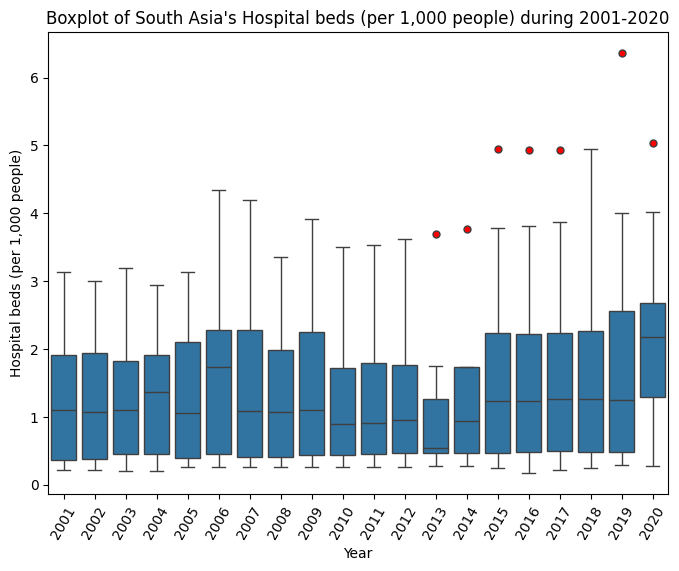

In [550]:
df_hos = df_hos.melt(id_vars=["Year"], var_name="Country", value_name=val1)
df_life = df_life.melt(id_vars=["Year"], var_name="Country", value_name=val2)

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_hos[val1], x=df_hos["Year"],
            showfliers=True,
            flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5})

# ตั้งชื่อกราฟ
plt.ylabel(val1)
plt.xlabel("Year")
plt.title(f"Boxplot of {region}'s {val1} during 2001-2020")
plt.xticks(rotation=60)

# แสดงกราฟ
plt.show()

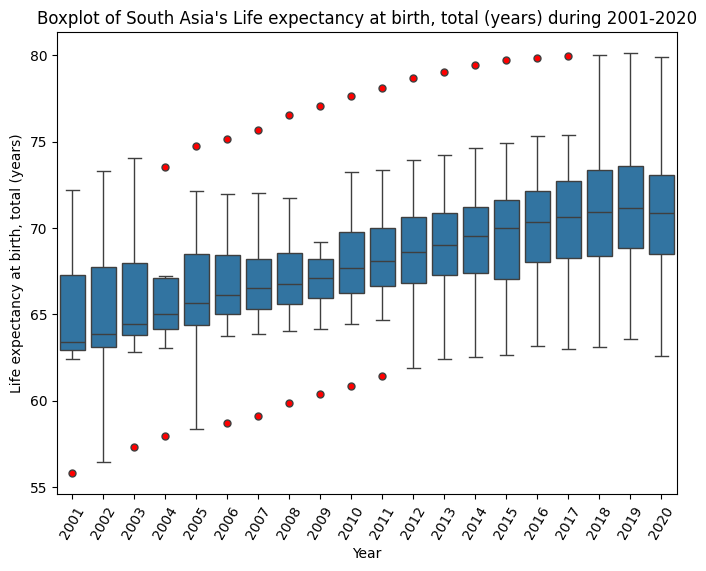

In [551]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_life[val2], x=df_life["Year"],
            showfliers=True,
            flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5})

# ตั้งชื่อกราฟ
plt.ylabel(val2)
plt.xlabel("Year")
plt.title(f"Boxplot of {region}'s {val2} during 2001-2020")
plt.xticks(rotation=60)

# แสดงกราฟ
plt.show()

### Trends

In [552]:
def show_trend(df,Title):
    plt.plot(df["Year"], df["Mean"], label="Mean", marker="o", linestyle="-", color="blue")
    plt.plot(df["Year"], df["Median"], label="Median", marker="s", linestyle="--", color="orange")
    plt.plot(df["Year"], df["Std Dev"], label="Std Dev", marker="^", linestyle="-.", color="green")
    plt.title(f"Trend of {region}'s {Title}")
    plt.xticks(ticks=df["Year"], labels=df["Year"], rotation=60)
    plt.legend(fontsize=10, loc='best', ncol=3)
    plt.grid(True)
    plt.show()

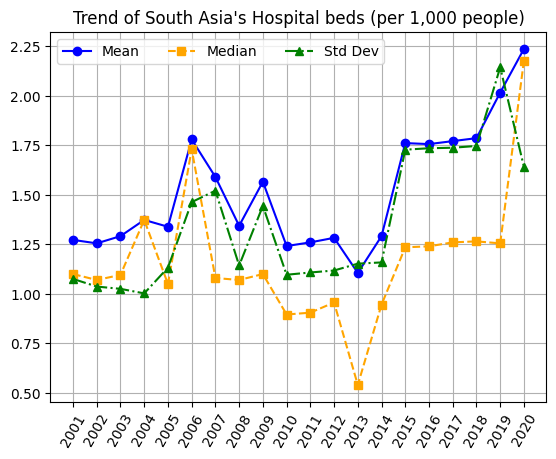

In [553]:
show_trend(df_hos_region, val1)

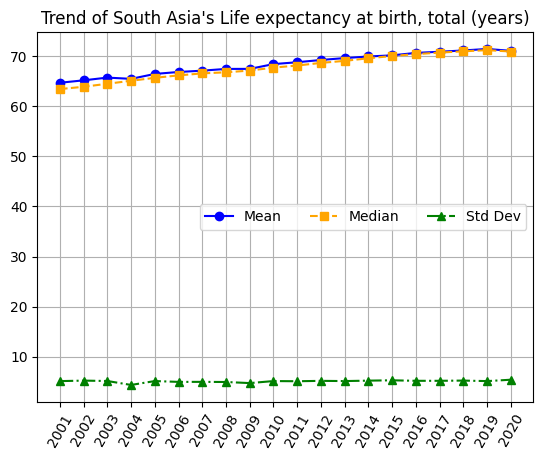

In [554]:
show_trend(df_life_region, val2)

### Correlation

In [555]:
def show_scatterplot(df1, df2, opt):
    # รวมข้อมูลเข้าด้วยกัน (Merge ตาม Country และ Year)
    df_merged = df1.merge(df2, on=["Year", "Country"])

    # เลือกเฉพาะคอลัมน์ที่ต้องการ และเรียงลำดับปีใหม่ให้อยู่ข้างหน้า
    df_selected = df_merged[[opt, val1, val2]]

    # สร้าง Scatter Plot
    plt.figure(figsize=(10, 6))

    if opt == "Year":
        p = "viridis"
    elif opt == "Country":
        p = "tab10"

    sns.scatterplot(
        x=df_selected[val2], 
        y=df_selected[val1],
        hue=df_selected[opt],  # ให้สีแยกตามปี
        palette=p,
        s=80, alpha=0.7  # ขนาดจุดและความโปร่งใส
    )

    # ตั้งชื่อกราฟ
    plt.xlabel(val2)
    plt.ylabel(val1)
    plt.title(f"Scatter Plot of {val2} vs {val1} in {region} by {opt}")

    # แสดง Legend นอกกราฟ
    plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')

    # แสดงกราฟ
    plt.show()

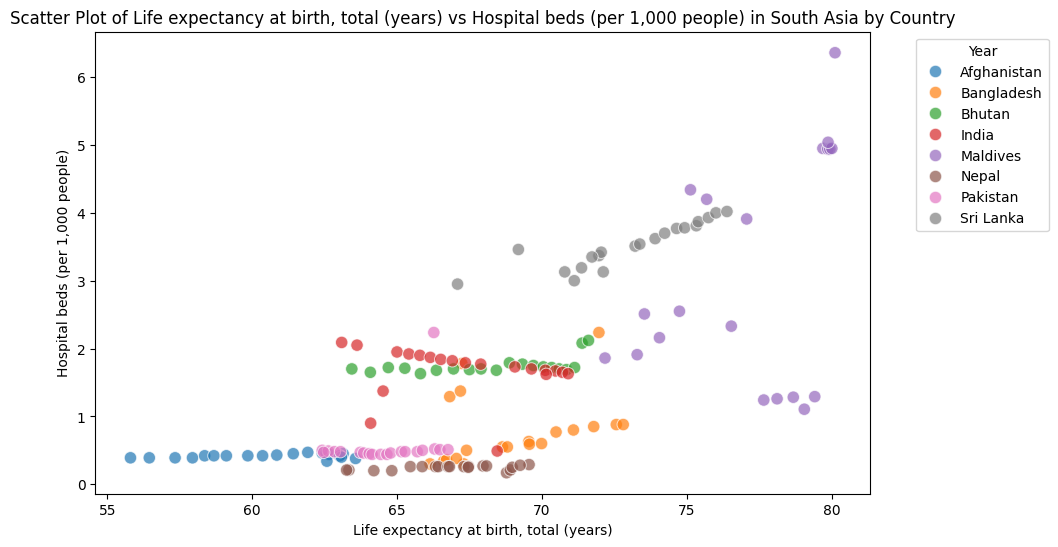

In [556]:
show_scatterplot(df_life, df_hos, "Country")

In [557]:
df_merged = df_hos.merge(df_life, on=["Year", "Country"])
#df_merged.head(5)

In [558]:
def calculate_correlation(df, method="overall"):
    if method == "overall":
        correlation = df[[val2, val1]].corr()
        return correlation

    elif method == "by_year":
        correlation_by_year = df.groupby("Year")[[val2, val1]].corr().unstack().iloc[:, 1]
        return correlation_by_year

    elif method == "by_country":
        correlation_by_country = df.groupby("Country")[[val2, val1]].corr().unstack().iloc[:, 1]
        return correlation_by_country

    else:
        raise ValueError("Invalid method. Choose 'overall', 'by_year', or 'by_country'.")

In [559]:
'''# 1️⃣ Correlation ทั้ง Dataset
overall_corr = calculate_correlation(df_merged, "overall")
print("Overall Correlation:")
print(overall_corr)'''

# 2️⃣ Correlation รายปี
yearly_corr = calculate_correlation(df_merged, "by_year")
print("\nYearly Correlation:")
print(yearly_corr)

'''# 3️⃣ Correlation รายประเทศ
country_corr = calculate_correlation(df_merged, "by_country")
print("\nCountry-wise Correlation:")
print(country_corr)'''


Yearly Correlation:
Year
2001    0.606635
2002    0.634886
2003    0.800822
2004    0.714637
2005    0.738378
2006    0.896594
2007    0.855739
2008    0.714708
2009    0.799815
2010    0.524578
2011    0.517987
2012    0.528876
2013    0.519152
2014    0.543493
2015    0.925077
2016    0.906295
2017    0.896355
2018    0.888947
2019    0.887218
2020    0.871456
Name: (Life expectancy at birth, total (years), Hospital beds (per 1,000 people)), dtype: float64


'# 3️⃣ Correlation รายประเทศ\ncountry_corr = calculate_correlation(df_merged, "by_country")\nprint("\nCountry-wise Correlation:")\nprint(country_corr)'

### Distribution

In [560]:
def distribution_by_country(df, val):
    df["Country"] = df["Country"].astype(str)

    # 🔹 สร้าง KDE Plot
    plt.figure(figsize=(12, 6))
    ax = sns.kdeplot(
        data=df, 
        x=val, 
        hue="Country", 
        palette="tab10",  # 🔹 ใช้ tab10 เพื่อให้สีไม่ซ้ำกัน
        fill=True, 
        alpha=0.6
    )

    # ตั้งชื่อกราฟ
    plt.xlabel(val)
    plt.ylabel("Density")
    plt.title(f"Distribution of {val} by Country")

    # 🔹 ตรวจสอบว่า Legend ถูกสร้างขึ้นหรือไม่
    if ax.get_legend() is None:
        plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        handles, labels = ax.get_legend_handles_labels()
        if labels:  # ถ้ามี labels ให้ update legend
            plt.legend(handles, labels, title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

    # แสดงกราฟ
    plt.show()

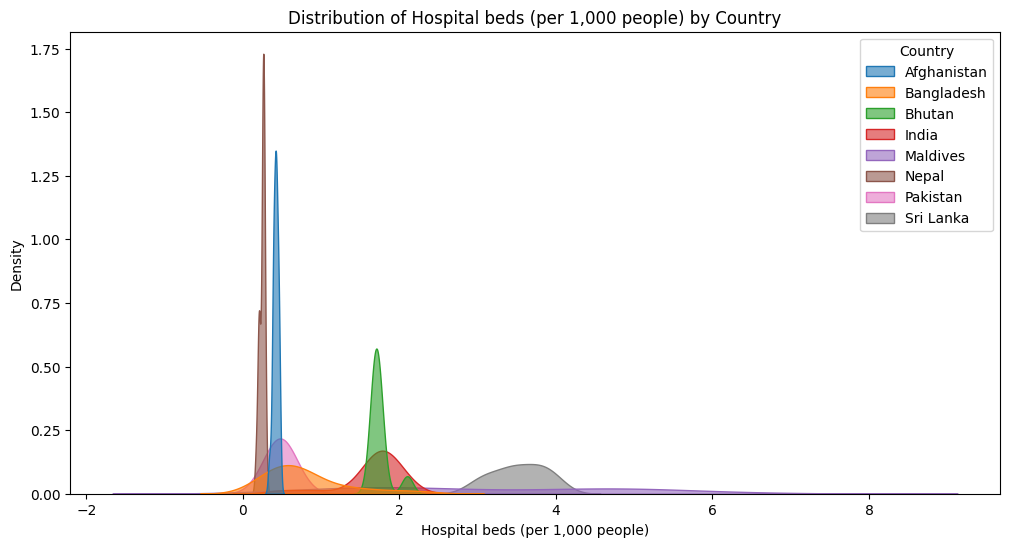

In [561]:
distribution_by_country(df_hos, val1)
#distribution_by_country(df_life, val2)

In [562]:
def distribution_by_year(df, val):
    # 🔹 แปลงให้คอลัมน์ "Year" เป็น string เพื่อใช้เป็น hue
    df["Year"] = df["Year"].astype(str)

    # 🔹 สร้าง KDE Plot
    plt.figure(figsize=(12, 6))
    ax = sns.kdeplot(
        data=df, 
        x=val, 
        hue="Year", 
        palette="coolwarm",  # 🔹 ใช้ coolwarm เพื่อให้แยกสีตามปีชัดเจน
        fill=True, 
        alpha=0.5
    )

    # ตั้งชื่อกราฟ
    plt.xlabel(val)
    plt.ylabel("Density")
    plt.title(f"Distribution of {val} by Year")

    # 🔹 ตรวจสอบว่า Legend ถูกสร้างขึ้นหรือไม่
    if ax.get_legend() is None:
        plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        handles, labels = ax.get_legend_handles_labels()
        if labels:  # ถ้ามี labels ให้ update legend
            plt.legend(handles, labels, title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')

    # แสดงกราฟ
    plt.show()

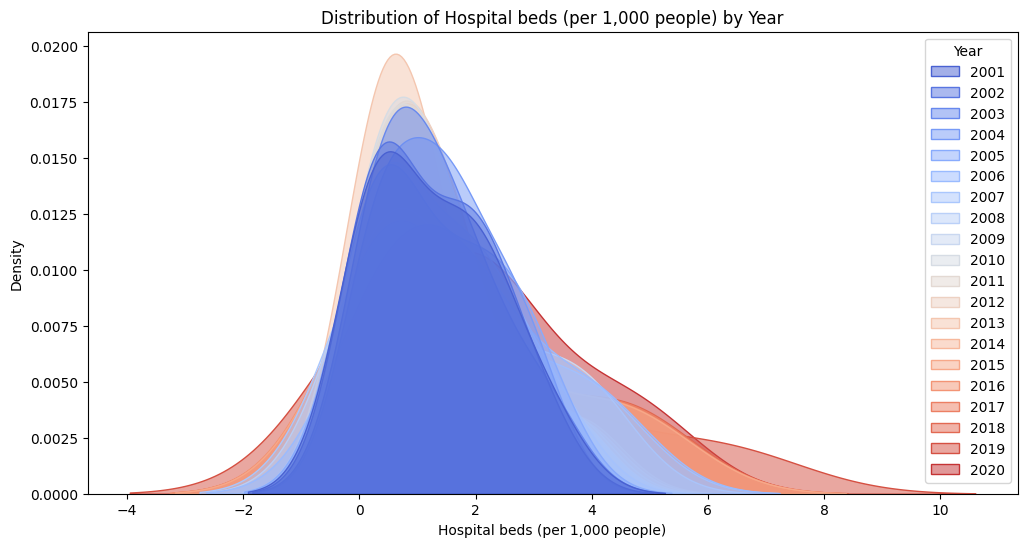

In [563]:
distribution_by_year(df_hos, val1)
#distribution_by_year(df_life, val2)

## Independent Test

### Remove Outlier

In [564]:
from scipy.stats import zscore

df_hos = df_hos_ori
df_life = df_life_ori

def remove_outliers(df, z_threshold=3.0, impute_with="median"):
    # 1) แปลงเป็น Long Format
    df_melted = df.melt(id_vars=["Year"], var_name="Country", value_name="Value")
    
    # 2) groupby แค่ Year เพื่อหาค่า Q1, Q3
    iqr_stats = df_melted.groupby("Year")["Value"].agg(
        Q1=lambda x: x.quantile(0.2),
        Q3=lambda x: x.quantile(0.8),
        median="median"   # เก็บ median ไว้ด้วย
    ).reset_index()
    
    # 3) คำนวณ IQR กับ Boundaries
    iqr_stats["IQR"] = iqr_stats["Q3"] - iqr_stats["Q1"]
    iqr_stats["Lower_Bound"] = iqr_stats["Q1"] - 1.5 * iqr_stats["IQR"]
    iqr_stats["Upper_Bound"] = iqr_stats["Q3"] + 1.5 * iqr_stats["IQR"]
    
    # 4) Merge เพื่อนำค่าพวกนี้ไปใช้
    df_merged = df_melted.merge(iqr_stats, on="Year", how="left")
    
    # 5) แทนที่ Outlier ด้วย median ของปีนั้น
    is_outlier = (df_merged["Value"] < df_merged["Lower_Bound"]) | (df_merged["Value"] > df_merged["Upper_Bound"])
    
    df_merged.loc[is_outlier, "Value"] = df_merged.loc[is_outlier, "median"]
    
    # 6) Pivot กลับเป็น Wide Format
    df_cleaned = df_merged.pivot(index="Year", columns="Country", values="Value").reset_index()
    
    return df_cleaned

df_hos = remove_outliers(df_hos)
df_life = remove_outliers(df_life)

In [565]:
# Before remove outlier
df_hos_ori.head(20)
#df_life_ori.head(20)

,Year,Afghanistan,Bangladesh,Bhutan,India,Maldives,Nepal,Pakistan,Sri Lanka
0,2001,0.39,0.300000,1.70,2.090000,1.860000,0.21,0.500000,3.13
1,2002,0.39,0.340000,1.65,2.050000,1.910000,0.21,0.490000,3.00
2,2003,0.39,1.291429,1.72,0.900000,2.160000,0.20,0.480000,3.19
3,2004,0.39,1.373333,1.71,1.373333,2.510000,0.20,0.480000,2.95
4,2005,0.42,0.300000,1.63,1.950000,2.550000,0.26,0.470000,3.13
5,2006,0.42,1.780000,1.68,1.920000,4.340000,0.26,0.470000,3.37
6,2007,0.42,0.360000,1.70,1.900000,4.200000,0.26,0.460000,3.42
7,2008,0.42,0.380000,1.69,1.870000,2.330000,0.26,0.450000,3.35
8,2009,0.42,0.500000,1.70,1.840000,3.910000,0.26,0.440000,3.46
9,2010,0.43,0.550000,1.68,1.820000,1.241429,0.26,0.440000,3.51


In [566]:
# After remove outlier
df_hos.head(20)
#df_life.head(20)

Country,Year,Afghanistan,Bangladesh,Bhutan,India,Maldives,Nepal,Pakistan,Sri Lanka
0,2001,0.39,0.300000,1.70,2.090000,1.860000,0.21,0.500000,3.130000
1,2002,0.39,0.340000,1.65,2.050000,1.910000,0.21,0.490000,3.000000
2,2003,0.39,1.291429,1.72,0.900000,2.160000,0.20,0.480000,3.190000
3,2004,0.39,1.373333,1.71,1.373333,2.510000,0.20,0.480000,2.950000
4,2005,0.42,0.300000,1.63,1.950000,2.550000,0.26,0.470000,3.130000
5,2006,0.42,1.780000,1.68,1.920000,4.340000,0.26,0.470000,3.370000
6,2007,0.42,0.360000,1.70,1.900000,4.200000,0.26,0.460000,3.420000
7,2008,0.42,0.380000,1.69,1.870000,2.330000,0.26,0.450000,3.350000
8,2009,0.42,0.500000,1.70,1.840000,3.910000,0.26,0.440000,3.460000
9,2010,0.43,0.550000,1.68,1.820000,1.241429,0.26,0.440000,3.510000


### Analysis

In [567]:
hos_life = pd.concat([df_hos_region['Median'], df_life_region['Median']], axis=1)
hos_life.columns = [val1, val2]
hos_life.index = df_hos_region['Year']
hos_life

,"Hospital beds (per 1,000 people)","Life expectancy at birth, total (years)"
Year,,
2001,1.100000,63.390
2002,1.070000,63.850
2003,1.095714,64.450
2004,1.373333,65.045
2005,1.050000,65.635
2006,1.730000,66.115
2007,1.080000,66.520
2008,1.070000,66.735
2009,1.100000,67.080


In [571]:
import scipy.stats as stats

# Chi-squre test
chi2, p, dof, expected = stats.chi2_contingency(hos_life)
chi2, p, dof, expected

(1.6753358978814081,
 0.9999999229303651,
 19,
 array([[ 1.09173019, 63.39826981],
        [ 1.09900952, 63.82099048],
        [ 1.10960203, 64.43611225],
        [ 1.12437432, 65.29395902],
        [ 1.12888863, 65.55611137],
        [ 1.14852589, 66.69647411],
        [ 1.14437837, 66.45562163],
        [ 1.14784875, 66.65715125],
        [ 1.154197  , 67.025803  ],
        [ 1.16072663, 67.40498766],
        [ 1.16790923, 67.82209077],
        [ 1.1776674 , 68.38876117],
        [ 1.17747393, 68.37752607],
        [ 1.1930604 , 69.28265389],
        [ 1.20574481, 70.01925519],
        [ 1.21209306, 70.38790694],
        [ 1.21751024, 70.70248976],
        [ 1.22199634, 70.96300366],
        [ 1.22572065, 71.17927935],
        [ 1.23678071, 71.82155262]]))

In [572]:
# alpha value
alpha = 0.05
stats.chi2.ppf(1 - alpha, dof)

30.14352720564616

In [573]:
# p_value
p_value = 1 - stats.chi2.cdf(chi2, dof)
p_value

0.9999999229303651